<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #9 - Least Square Fitting


**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

## **Activity I:** Determination of Absolute Zero

### Instructions

Locate the file called PT.cmbl in Canvas in the "Additional Information" module in the "Lab 9 Least Square Fitting" page. Copy this file on to your computer Desktop. Inside Logger Pro, open up the PT.cmbl file.

Obtain a DRY, ROOM TEMPERATURE flask and FIRMLY insert the rubber stopper assembly into the flask. Connect the piece of plastic tubing to the pressure sensor. Make sure that the valve is open.

Fill a water bath with the hottest water you can get from the tap. The water needs to be deep enough so that as much of the flask as possible is under water without getting the stopper assembly wet. Hold the flask upright in the bath for at least a minute. While you are waiting for the pressure to stabilize, keep the water temperature uniform by stirring the water with the temperature probe. The pressure should remain fairly constant during the waiting time.

When you are ready to start the experiment, click on the green button and then the "Keep" symbol Both the temperature and the pressure will be recorded at the same time.

By adding ice, cool the water temperature by approximately 5° C. Agitate the water in the bath as before. With the thermometer next to the flask, click on the "Keep" symbol to record both the pressure and the temperature.

Continue this process until you have dropped the temperature down close to 0° C. After your final reading, terminate the experiment by clicking on the red button. Save your file to your computer.

Follow the same procedure shown in Section 8.5 of the textbook on pp. 190-192 to computer a value for absolute zero with its uncertainty.

Write Python code that computes all of the values shown on pp. 190-191 and outputs the y-intercept ($A$) and the uncertainty of the y-intercept ($\sigma{}_{A}$).

Using your $P$ and $T$ data and your values for $A$ and $\sigma{}_{A}$, make a plot similar to that found in Figure 8.4 in the textbook (pg. 192).

### Python Code

In [4]:
# Author: Kyle Mueller
prod = lambda x,y: x * y
square = lambda x: x**2
sqrt = lambda x: x**0.5

T = [354.3370167, 344.2745166, 342.0870166, 339.7120165, 337.5245165, 334.7745165, 334.7120165, 331.8370164, 330.3370164, 328.3995164, 327.1495163, 324.2745163, 320.8995163, 318.0245162, 314.0870161, 311.0870161, 307.8370161, 303.649516, 300.774516, 297.4620159]
P = [759.9049801, 744.2215548, 739.1318394, 734.6635427, 732.4145987, 727.7687539, 724.7208429, 721.0515132, 718.3882901, 714.0383589, 710.2802551, 704.7762605, 697.5263753, 692.9397131, 685.3051401, 680.245016, 672.048207, 663.4075274, 657.5484364, 650.2393684]

ΣP = sum(P)
ΣT = sum(T)
ΣPT = sum(map(prod, P, T))
ΣP2 = sum(map(square, P))

N = len(P)
Δ = N*ΣP2 - ΣP**2

A = (ΣP2*ΣT - ΣP*ΣPT)/Δ
B = (N*ΣPT - ΣP*ΣT)/Δ

σ_y = sqrt((1/(N-2)) * sum(map(lambda p,t: (t - A - B*p)**2, P, T)))
σ_A = σ_y * sqrt(ΣP2/Δ)
σ_B = σ_y * sqrt(N/Δ)

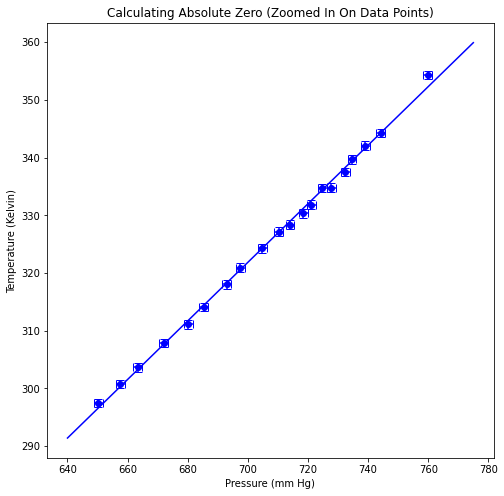

In [9]:
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, figure, axes, title
from scipy import stats
%matplotlib inline

x_g = linspace(640, 775, 10)
y_g = B * x_g + A

figure(figsize=(8,8))
ax = axes()
ax.errorbar(P, T, xerr = σ_y/B, yerr = σ_y, fmt = 'bo', capsize = 4)
ax.plot(x_g,y_g,'b')
xlabel('Pressure (mm Hg)')
ylabel('Temperature (Kelvin)')
title('Calculating Absolute Zero (Zoomed In On Data Points)')
show()

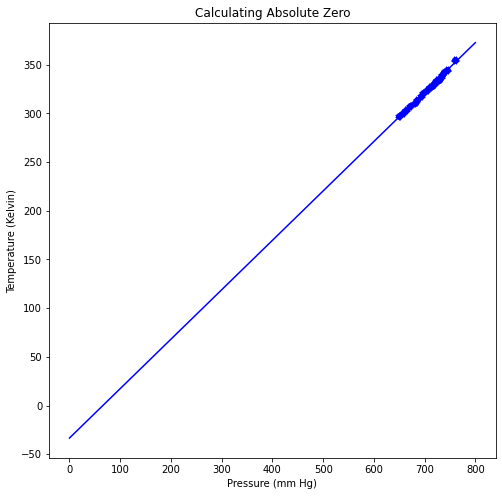

In [10]:
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, figure, axes, title
from scipy import stats
%matplotlib inline

x_g = linspace(0, 800, 10)
y_g = B * x_g + A

figure(figsize=(8,8))
ax = axes()
ax.errorbar(P, T, xerr = σ_y/B, yerr = σ_y, fmt = 'bo', capsize = 4)
ax.plot(x_g,y_g,'b')
xlabel('Pressure (mm Hg)')
ylabel('Temperature (Kelvin)')
title('Calculating Absolute Zero')
show()

In [3]:
print(f"We calculated absolute zero as {A:1.0f} ± {σ_A:1.0f} Kelvin")

We calculated absolute zero as -33 ± 4 Kelvin


Our absolute zero calculation was flawed likely due to the calibration of the equipment used to make measurements.

## **Activity II:** Hooke's Law

### Instructions

Hooke's Law is written as:

$$F = kx$$

where $F$ (mg for this activity) is the applied force, $k$ is the spring constant, and $x$ is the stretch. By hanging masses (use increments of 20 grams until you fill up the holder) on a spring, measure the force and stretch of the string.

Make a plot of $F$ vs. $x$. Include error bars in your graph. Fit a straignt line and determine values of k and $\delta{}k$ from the slope of your graph in units N/m.

You can use code from previous labs. It is not necessary to go through the same calculation you went through in Activity 1 to determine the sloipe and its uncertainty.

### Python Code

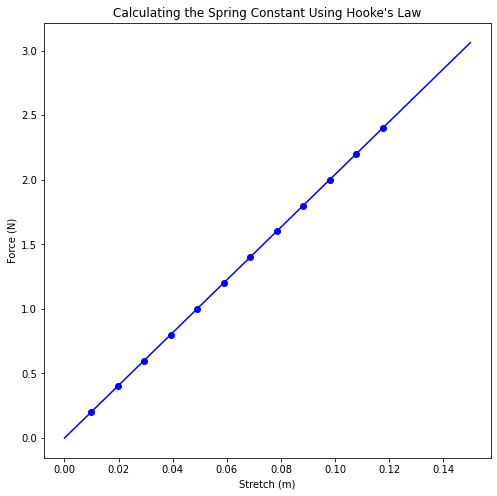

In [ ]:
F_cm = [20,40,60,80,100,120,140,160,180,200,220,240]
F = [*map(lambda n: n/100, F_cm)]
x_g = [1,2,3,4,5,6,7,8,9,10,11,12]
x = [*map(lambda n: n * 0.0098, x_g)]

from pylab import plot, show, xlabel, ylabel, figure, axes, title
from scipy import stats
%matplotlib inline

# Compute the least-square fit 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,F)
x_h = linspace(0, 0.15, 10)
y_h = slope * x_h + intercept

# Plot a graph of sin i vs. sin r for acrylic along with the fit
figure(figsize=(8,8))
ax_h = axes()
ax_h.errorbar(x, F, fmt = 'bo', capsize = 4)
ax_h.plot(x_h,y_h,'b')
xlabel('Stretch (m)')
ylabel('Force (N)')
title("Calculating the Spring Constant Using Hooke's Law")
show()

In [ ]:
print(f"The spring constant is {slope:0.1f} ± {std_err:0.1f} N/m")

The spring constant is 20.4 ± 0.0 N/m


## **Activity III:** Ohm's Law

### Instructions

Ohm's Law is given by:

$$V=IR$$

where $V$ is the voltage in volts, $I$ is the current in amps, and $R$ is the resistance in ohms.

Vary the voltage from 1 to 10 volts in 1 volt increments. Make a plot of $V$ vs. $I$. Fit a straight line and determine values of $R$ and $\delta{}R$ from the slope of your graph in units of ohms.


### Python Code

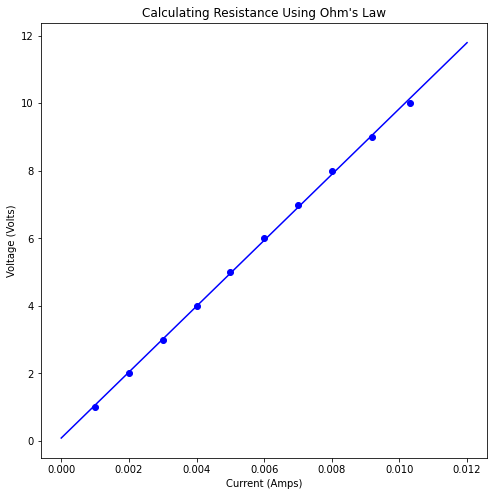

In [ ]:
V = [1,2,3,4,5,6,7,8,9,10]
I_mA = [1,2,3,4,5,6,7,8,9.2,10.3]
I = [*map(lambda n: n/1000, I_mA)]

from numpy import linspace
from pylab import plot, show, xlabel, ylabel, figure, axes, title
from scipy import stats
%matplotlib inline

slope, intercept, r_value, p_value, std_err = stats.linregress(I,V)
x_o = linspace(0, 0.012, 10)
y_o = slope * x_o + intercept

figure(figsize=(8,8))
ax_o = axes()
ax_o.errorbar(I, V, fmt = 'bo', capsize = 4)
ax_o.plot(x_o,y_o,'b')
xlabel('Current (Amps)')
ylabel('Voltage (Volts)')
title("Calculating Resistance Using Ohm's Law")
show()

In [ ]:
print(f"The resistance is {slope:1.0f} ± {std_err:1.0f} Ω")

The resistance is 975 ± 9 Ω


## **Activity IV** Walking Distance

### Instructions

Use the Vernier motion detector to collect data as you walk towards or away from the detector at constant speed. Collect at least 10 data points of time and position. Plot your position vs. time data and fit a straight line to the data. Give a value for the velocity and its uncertainty in units of m/s. Compare these values to the mean and standard deviation taken from the v vs. t graph in Logger Pro.

### Python Code

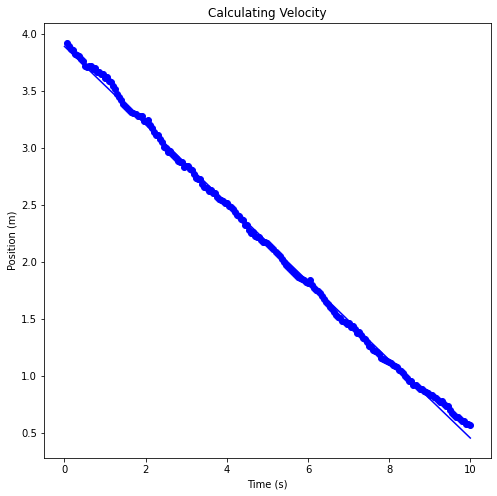

In [ ]:
t = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95, 5, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10]
p = [3.923234, 3.896137, 3.867325, 3.856349, 3.823764, 3.8181045, 3.8067855, 3.777116, 3.764768, 3.719492, 3.7121175, 3.717091, 3.714347, 3.693424, 3.70097, 3.6699285, 3.669757, 3.648148, 3.6462615, 3.61179, 3.625167, 3.5882945, 3.5804055, 3.544905, 3.51575, 3.477334, 3.4504085, 3.4219395, 3.3872965, 3.37169, 3.351796, 3.3320735, 3.3180105, 3.308235, 3.2984595, 3.2813095, 3.2799375, 3.2782225, 3.2332895, 3.2401495, 3.246495, 3.201562, 3.175837, 3.1355345, 3.116841, 3.11444, 3.0755095, 3.0542435, 3.009139, 3.0003925, 2.9674645, 2.9770685, 2.948771, 2.929563, 2.9129275, 2.885316, 2.8796565, 2.8751975, 2.8350665, 2.843813, 2.8402115, 2.8124285, 2.804368, 2.77487, 2.7386835, 2.728908, 2.725135, 2.679173, 2.656192, 2.647274, 2.621549, 2.6326965, 2.6076575, 2.604399, 2.5709565, 2.5527775, 2.5445455, 2.534427, 2.5153905, 2.5177915, 2.494639, 2.482291, 2.4611965, 2.4402735, 2.415749, 2.399285, 2.3737315, 2.369444, 2.327255, 2.3195375, 2.280607, 2.2560825, 2.26037, 2.2231545, 2.220925, 2.2180095, 2.193828, 2.178736, 2.17462, 2.165359, 2.1442645, 2.1295155, 2.10945, 2.0897275, 2.065203, 2.053541, 2.02713, 2.002091, 1.976709, 1.9551, 1.934177, 1.9192565, 1.906737, 1.887529, 1.871408, 1.862833, 1.84877, 1.843968, 1.8280185, 1.8177285, 1.8393375, 1.801093, 1.7738245, 1.7532445, 1.746213, 1.7234035, 1.7035095, 1.67727, 1.6510305, 1.6280495, 1.603868, 1.5841455, 1.5567055, 1.53664, 1.5186325, 1.505427, 1.485533, 1.476615, 1.455349, 1.4620375, 1.4304815, 1.4349405, 1.408358, 1.379889, 1.3845195, 1.3570795, 1.335299, 1.321236, 1.3008275, 1.266699, 1.249206, 1.2315415, 1.215592, 1.209075, 1.195698, 1.158311, 1.1464775, 1.139103, 1.1324145, 1.1234965, 1.1145785, 1.0991435, 1.0867955, 1.0809645, 1.047522, 1.0422055, 1.0229975, 1.0034465, 0.9777215, 0.9581705, 0.9567985, 0.9211265, 0.9228415, 0.9032905, 0.8857975, 0.883225, 0.870534, 0.8604155, 0.8463525, 0.8316035, 0.8288595, 0.8130815, 0.803306, 0.785127, 0.773122, 0.777924, 0.755286, 0.739165, 0.732991, 0.6968045, 0.673652, 0.656502, 0.641067, 0.639009, 0.6199725, 0.6024795, 0.600936, 0.580699, 0.573839, 0.5664645]

from numpy import linspace
from pylab import plot, show, xlabel, ylabel, figure, axes, title
from scipy import stats
%matplotlib inline

slope, intercept, r_value, p_value, std_err = stats.linregress(t,p)
x_d = linspace(0, 10, 10)
y_d = slope * x_d + intercept

figure(figsize=(8,8))
ax_d = axes()
ax_d.errorbar(t, p, fmt = 'bo', capsize = 4)
ax_d.plot(x_d,y_d,'b')
xlabel('Time (s)')
ylabel('Position (m)')
title("Calculating Velocity")
show()

In [ ]:
print(f"The velocity is {slope:0.3f} ± {std_err:0.3f} m/s")

The velocity is -0.344 ± 0.001 m/s


In [ ]:
from statistics import stdev

avg = lambda l: sum(l)/len(l)

v = [-0.53165, -0.51107, -0.4348096667, -0.4125527778, -0.3582444444, -0.2739236111, -0.3793008333, -0.4364675, -0.5020186111, -0.4146488889, -0.1425355556, -0.0677425, -0.1644494444, -0.1690227778, -0.2300958333, -0.2693502778, -0.2454355556, -0.2564877778, -0.3014588889, -0.2548680556, -0.2845947222, -0.4077888889, -0.4740069444, -0.6052997222, -0.6469361111, -0.6389327778, -0.5872922222, -0.5827188889, -0.4963019444, -0.4008336111, -0.3767283333, -0.3240397222, -0.2582980556, -0.2222830556, -0.2279997222, -0.1896980556, -0.1618769444, -0.3307091667, -0.2904066667, -0.1195736111, -0.3679627778, -0.5923419444, -0.6160661111, -0.5351752778, -0.3545286111, -0.4347525, -0.5555647222, -0.6049186111, -0.5256475, -0.4074077778, -0.2865002778, -0.2649675, -0.3923538889, -0.3809205556, -0.3930208333, -0.3201333333, -0.2279997222, -0.3325194444, -0.2631572222, -0.1207169444, -0.2638241667, -0.3476686111, -0.4208419444, -0.5315547222, -0.4358958333, -0.3095575, -0.4570475, -0.5458463889, -0.3855891667, -0.3159411111, -0.1953194444, -0.1882688889, -0.2783063889, -0.3594830556, -0.4178883333, -0.2999344444, -0.2324777778, -0.2464836111, -0.2055141667, -0.2369558333, -0.3201333333, -0.3517655556, -0.4074077778, -0.4327516667, -0.4134102778, -0.4025486111, -0.3637705556, -0.4403738889, -0.4842969444, -0.4851544444, -0.5100219444, -0.3208955556, -0.3205144444, -0.3088905556, -0.1795986111, -0.2571547222, -0.3056511111, -0.22638, -0.1986541667, -0.2806883333, -0.3372833333, -0.3609122222, -0.3928302778, -0.4129338889, -0.3889238889, -0.4101708333, -0.4795330556, -0.4889655556, -0.4644791667, -0.4176025, -0.3594830556, -0.3083188889, -0.3145119444, -0.3181325, -0.2619186111, -0.2295241667, -0.2054188889, -0.1967486111, -0.1812183333, -0.05649972222, -0.2239027778, -0.4804858333, -0.4468527778, -0.343, -0.3351872222, -0.4083605556, -0.4588577778, -0.5003988889, -0.4895372222, -0.4725777778, -0.4548561111, -0.4617161111, -0.4477102778, -0.3873041667, -0.334425, -0.3218483333, -0.2909783333, -0.2722086111, -0.2037991667, -0.23667, -0.26754, -0.2868813889, -0.4101708333, -0.30184, -0.2989816667, -0.4035966667, -0.3815875, -0.3981658333, -0.4859166667, -0.4741022222, -0.3801583333, -0.3225152778, -0.2617280556, -0.2785922222, -0.4203655556, -0.4089322222, -0.2490561111, -0.1734055556, -0.1640683333, -0.1889358333, -0.2300958333, -0.2569641667, -0.2478175, -0.3421425, -0.35329, -0.3124158333, -0.3783480556, -0.4168402778, -0.4039777778, -0.2974572222, -0.3323288889, -0.3123205556, -0.2491513889, -0.2963138889, -0.221235, -0.1902697222, -0.2196152778, -0.2385755556, -0.2524861111, -0.2037038889, -0.2061811111, -0.2459119444, -0.2624902778, -0.25039, -0.1571130556, -0.2048472222, -0.3097480556, -0.3019352778, -0.4153158333, -0.4979216667, -0.4103613889, -0.3220388889, -0.2293336111, -0.2359077778, -0.2916452778, -0.2297147222, -0.2260941667, -0.231182, -0.1777883333, -0.159495]
v_std_dev = stdev(v)
v_avg = avg(v)

print(f"The average velocity is {v_avg:0.2f} ± {v_std_dev:0.2f} m/s")

The average velocity is -0.34 ± 0.12 m/s


The velocity we found with linear square fitting is more accurate than the velocity we found by taking the mean of the measured velocity.